## Scoring Crediticio con Modelos de Machine Learning

En este proyecto se desarrolla un modelo predictivo de riesgo crediticio utilizando el dataset “Credit”. Este conjunto de datos contiene información financiera de clientes, con el objetivo de predecir si una persona tendrá un evento serio de morosidad en los próximos dos años.

### Características principales del dataset:

- **Observaciones:** 16.714 registros.
- **Variables:** 11 características, incluyendo uso de líneas de crédito, edad, moras previas, razón deuda/ingreso, número de créditos abiertos, número de dependientes, entre otras.

- **Detalle de variables:**

| Variable                                 | Descripción                                                                                          |
|-------------------------------------------|------------------------------------------------------------------------------------------------------|
| **RevolvingUtilizationOfUnsecuredLines**  | Ratio de utilización de líneas de crédito no garantizadas (saldo utilizado/total disponible).        |
| **age**                                  | Edad del cliente (en años).                                                                          |
| **NumberOfTime30-59DaysPastDueNotWorse** | Número de veces que el cliente ha estado entre 30 y 59 días en mora, sin haber sido peor.            |
| **DebtRatio**                            | Proporción deuda/ingreso mensual (todas las deudas / ingreso mensual bruto).                         |
| **MonthlyIncome**                        | Ingreso mensual declarado por el cliente.                                                            |
| **NumberOfOpenCreditLinesAndLoans**      | Número de líneas de crédito y préstamos abiertos actualmente.                                        |
| **NumberOfTimes90DaysLate**              | Número de veces que el cliente ha estado en mora por más de 90 días.                                 |
| **NumberRealEstateLoansOrLines**         | Número de préstamos o líneas de crédito inmobiliario.                                                |
| **NumberOfTime60-89DaysPastDueNotWorse** | Número de veces que el cliente ha estado entre 60 y 89 días en mora, sin haber sido peor.            |
| **NumberOfDependents**                   | Número de personas dependientes del cliente (hijos, familiares, etc.).                               |
| **SeriousDlqin2yrs**                     | Variable objetivo: 1 si el cliente tuvo un evento grave de morosidad en los próximos 2 años, 0 si no.|



Se aplican procesos estándar de la industria: análisis exploratorio, preprocesamiento, selección de características, entrenamiento y comparación de modelos, evaluación con métricas relevantes, e interpretación de resultados para asegurar la explicabilidad del sistema.

### Objetivo:

Construir un modelo robusto, preciso y explicable que ayude a identificar clientes con alto riesgo de morosidad, optimizando la gestión del crédito y minimizando pérdidas para la institución financiera.


## Análisis Exploratorio del Dataset

Se analiza el dataset “Credit” para entender la distribución y comportamiento de las variables financieras y demográficas. El objetivo es detectar valores atípicos, identificar posibles problemas de calidad de datos (como valores faltantes) y comprender la relación entre las características y la variable objetivo `SeriousDlqin2yrs`.

**Aspectos a revisar:**
- Estadísticas descriptivas generales.
- Distribución de la variable objetivo (morosidad en 2 años).
- Identificación de outliers y valores extremos en variables numéricas.
- Revisión de valores faltantes.
- Relación entre variables clave y la variable objetivo.


In [46]:
!pip install --upgrade scikit-learn



In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_score, recall_score



In [48]:
# Cargar dataset
df = fetch_openml("Credit", version=1, as_frame=True).frame

# Mostrar primeras filas
df.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.006999,38.0,0.0,0.302150,5440.0,4.0,0.0,1.0,0.0,3.0,0.0
1,0.704592,63.0,0.0,0.471441,8000.0,9.0,0.0,1.0,0.0,0.0,0.0
2,0.063113,57.0,0.0,0.068586,5000.0,17.0,0.0,0.0,0.0,0.0,0.0
3,0.368397,68.0,0.0,0.296273,6250.0,16.0,0.0,2.0,0.0,0.0,0.0
4,1.000000,34.0,1.0,0.000000,3500.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  16714 non-null  float64
 1   age                                   16714 non-null  float64
 2   NumberOfTime30-59DaysPastDueNotWorse  16714 non-null  float64
 3   DebtRatio                             16714 non-null  float64
 4   MonthlyIncome                         16714 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       16714 non-null  float64
 6   NumberOfTimes90DaysLate               16714 non-null  float64
 7   NumberRealEstateLoansOrLines          16714 non-null  float64
 8   NumberOfTime60-89DaysPastDueNotWorse  16714 non-null  float64
 9   NumberOfDependents                    16714 non-null  float64
 10  SeriousDlqin2yrs                      16714 non-null  float64
dtypes: float64(11)


Se identificaron variables que conceptualmente representan conteos o categorías (que se presentan en la introducción) y que conviene convertir a entero (`int`). Esto facilita el análisis, visualización y evita advertencias en el modelado. El resto de las variables, al ser proporciones o ingresos, permanecen como `float`.

Así las variables que quedaron como float son:



*   `RevolvingUtilizationOfUnsecuredLines`
*   `DebtRatio`
*   `MonthlyIncome`






In [50]:
cols_to_int = [
    'age',
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberOfTimes90DaysLate',
    'NumberRealEstateLoansOrLines',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfDependents',
    'SeriousDlqin2yrs'
]

for col in cols_to_int:
    df[col] = df[col].astype(int)


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  16714 non-null  float64
 1   age                                   16714 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  16714 non-null  int64  
 3   DebtRatio                             16714 non-null  float64
 4   MonthlyIncome                         16714 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       16714 non-null  int64  
 6   NumberOfTimes90DaysLate               16714 non-null  int64  
 7   NumberRealEstateLoansOrLines          16714 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  16714 non-null  int64  
 9   NumberOfDependents                    16714 non-null  int64  
 10  SeriousDlqin2yrs                      16714 non-null  int64  
dtypes: float64(3), 

In [52]:
# Estadísticas descriptivas para variables continuas
cont_vars = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'age']
df[cont_vars].describe().T


,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,16714.0,4.799862,204.062345,0.0,0.082397,0.443080,0.926637,22000.0
DebtRatio,16714.0,30.980298,719.694859,0.0,0.155971,0.322299,0.533426,61106.5
MonthlyIncome,16714.0,6118.120258,5931.841779,0.0,3128.500000,5000.000000,7573.000000,250000.0
age,16714.0,48.798672,13.906078,21.0,38.000000,48.000000,58.000000,101.0


In [53]:
# Frecuencias absolutas para variables de conteo
count_vars = [
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberOfTimes90DaysLate',
    'NumberRealEstateLoansOrLines',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfDependents'
]
for col in count_vars:
    print(f"Frecuencia de valores en {col}:\n{df[col].value_counts().sort_index()}\n")


Frecuencia de valores en NumberOfTime30-59DaysPastDueNotWorse:
NumberOfTime30-59DaysPastDueNotWorse
0     11346
1      2873
2      1253
3       597
4       304
5       140
6        69
7        25
8         8
9         4
10        3
11        1
12        1
13        1
96        3
98       86
Name: count, dtype: int64

Frecuencia de valores en NumberOfOpenCreditLinesAndLoans:
NumberOfOpenCreditLinesAndLoans
0      367
1      589
2      751
3     1018
4     1170
5     1411
6     1439
7     1425
8     1268
9     1255
10    1034
11     896
12     805
13     623
14     524
15     453
16     355
17     294
18     224
19     153
20     175
21     108
22      85
23      68
24      49
25      33
26      29
27      26
28      19
29      15
30      12
31       8
32       6
33       8
35       2
36       3
37       1
39       1
40       2
41       1
43       1
45       1
46       1
47       1
48       2
49       1
52       1
57       1
Name: count, dtype: int64

Frecuencia de valores en NumberOfTim

En este dataset, **todas las variables son numéricas**. Algunas representan conteos de eventos o cantidades (por ejemplo, número de veces en mora, número de dependientes), **pero ninguna corresponde a una categoría nominal**. Por esta razón, **no fue necesario realizar codificación de variables categóricas** durante el preprocesamiento.


In [54]:
# Eliminar filas con valores imposibles (96, 98) en variables de eventos de mora
cols_with_invalids = [
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTimes90DaysLate',
    'NumberOfTime60-89DaysPastDueNotWorse'
]

for col in cols_with_invalids:
    df = df[~df[col].isin([96, 98])]


Por la **naturaleza del dato** al revisar la frecuencia de valores en las variables de eventos de atraso en pagos (`NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTimes90DaysLate` y `NumberOfTime60-89DaysPastDueNotWorse`), se detectaron valores imposibles como 96 y 98.  

Estos valores corresponden a diferentes tipos de atrasos, pero en ningún caso es realista que una persona tenga 96 o 98 eventos de este tipo en dos años. Generalmente, estos números son códigos internos de los sistemas para indicar datos faltantes o registros inválidos.

Por lo tanto, y para mantener la calidad y la coherencia del análisis, se eliminaron estas filas del dataset.


In [82]:
# Conteo absoluto de 0 y 1 en la variable objetivo
df['SeriousDlqin2yrs'].value_counts()


,count
SeriousDlqin2yrs,
0,8352
1,8273


La variable objetivo `SeriousDlqin2yrs` está levemente desbalanceada, la diferencia entre clases es muy pequeña (<1%). Esto no representa un problema relevante y permite entrenar y evaluar modelos sin riesgo significativo de sesgo por desbalance de clases. Las métricas y conclusiones siguen siendo válidas.


In [56]:
# Revisión rápida de valores faltantes
df.isnull().sum()


,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0
NumberOfDependents,0


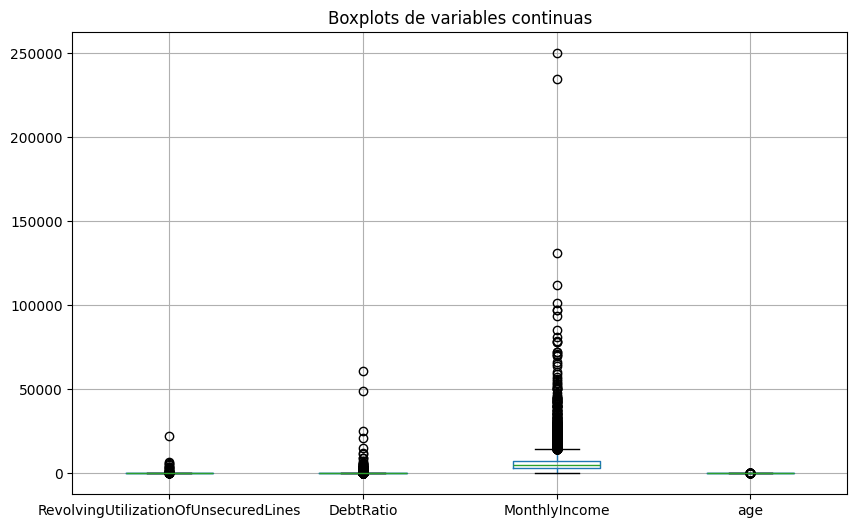

In [57]:
# Boxplots solo para variables continuas
cont_vars = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'age']
df[cont_vars].boxplot(figsize=(10, 6))
plt.title('Boxplots de variables continuas')
plt.show()




Se observa la presencia de numerosos valores atípicos (outliers) en las variables continuas, lo cual es común en datos financieros y de crédito.  
Dado que estos valores extremos suelen reflejar casos reales (y no errores de captura evidentes), y considerando que los modelos como Random Forest y Logistic Regression con regularización soportan bien los outliers, **no se realizará un tratamiento especial** de los mismos en esta etapa.



In [58]:
# Correlación de variables numéricas con la variable objetivo
corr = df.corr(numeric_only=True)['SeriousDlqin2yrs'].sort_values(ascending=False)
print(corr)


SeriousDlqin2yrs                        1.000000
NumberOfTime30-59DaysPastDueNotWorse    0.346920
NumberOfTimes90DaysLate                 0.308298
NumberOfTime60-89DaysPastDueNotWorse    0.284964
NumberOfDependents                      0.087982
NumberRealEstateLoansOrLines           -0.000463
RevolvingUtilizationOfUnsecuredLines   -0.005532
DebtRatio                              -0.013022
NumberOfOpenCreditLinesAndLoans        -0.042177
MonthlyIncome                          -0.079529
age                                    -0.208687
Name: SeriousDlqin2yrs, dtype: float64


Las correlaciones entre las variables independientes y la variable objetivo (`SeriousDlqin2yrs`) son bajas en general, lo cual es esperable en problemas de scoring crediticio.  
La edad (`age`) presenta la correlación negativa más fuerte, indicando que los clientes más jóvenes tienden a tener mayor riesgo de morosidad.  

Las demás (`NumberOfTime30-59DaysPastDueNotWorse`, etc.) tienen baja correlación positiva, lo esperable (más atrasos, más riesgo).

En conjunto, esto refuerza la necesidad de utilizar modelos multivariados capaces de capturar patrones complejos en los datos.

---

## Preprocesamiento de Datos

En esta etapa se realiza la preparación básica del dataset para asegurar que los modelos funcionen correctamente.  
Dado que no existen valores faltantes y las variables están en su tipo correcto, se enfocará el preprocesamiento en el escalado de variables numéricas y la preparación del dataset para el modelado.


In [59]:
# Separar variables predictoras y variable objetivo
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Dividir en entrenamiento y test (80/20, estratificado por balance perfecto)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [60]:
# Escalado de variables continuas (entrena scaler SOLO en el set de entrenamiento)
cont_vars = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'age']

scaler = StandardScaler()
X_train[cont_vars] = scaler.fit_transform(X_train[cont_vars])
X_test[cont_vars] = scaler.transform(X_test[cont_vars])

**Las variables de conteo no fueron escaladas**, ya que representan recuentos de eventos (frecuencias discretas). Mantener su escala original facilita la interpretación y se ajusta a las mejores prácticas para modelos clásicos de machine learning (árboles, regresión logística).

El escalado solo es recomendable si el modelo lo requiere explícitamente o si los rangos son muy dispares y afectan **métricas de distancia**, lo cual no aplica en este caso.

---


## Entrenamiento de Modelo Base

Se entrena un modelo base utilizando regresión logística, empleando todas las variables seleccionadas en el preprocesamiento previo.  
Este modelo base servirá como referencia para comparar mejoras posteriores (como regularización y modelos de mayor complejidad).


In [63]:
# Modelo base Random Forest
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)

# Predicciones en test
y_pred_rf = rf_base.predict(X_test)
y_proba_rf = rf_base.predict_proba(X_test)[:, 1]

# Métricas principales
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf))


Accuracy: 0.7560902255639098
Precision: 0.7592137592137592
Recall: 0.7468277945619335
F1-score: 0.7529698446542796
AUC-ROC: 0.8288854315538108


El modelo Random Forest obtuvo las siguientes métricas principales en el set de test:

- **Accuracy:** 0.756  
  El modelo acierta aproximadamente en el 76% de los casos, es decir, predice correctamente si un cliente tendrá o no morosidad grave en los próximos 2 años en 3 de cada 4 casos.

- **Precision:** 0.759  
  La precisión indica que, de todos los clientes que el modelo predijo como morosos, el 75.9% realmente eran morosos. Es decir, el modelo tiene un buen control sobre los falsos positivos (personas que no eran morosas pero el modelo predijo que sí).

- **Recall:** 0.746  
  El recall muestra que el modelo logra identificar correctamente al 74.8% de los clientes que realmente fueron morosos. En otras palabras, el modelo detecta la mayoría de los casos de morosidad, aunque deja pasar algunos (falsos negativos).


- **F1-score:** 0.752  
  El F1-score, que combina precisión y recall, indica que el modelo tiene un buen balance entre identificar correctamente a los clientes morosos y no morosos.
  
- **AUC-ROC:** 0.828  
  El valor AUC-ROC superior a 0.8 sugiere que el modelo es bueno separando las dos clases (moroso/no moroso).

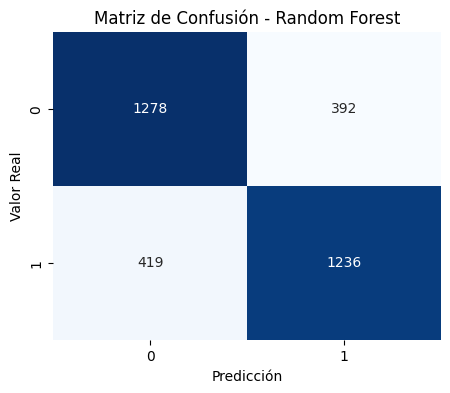

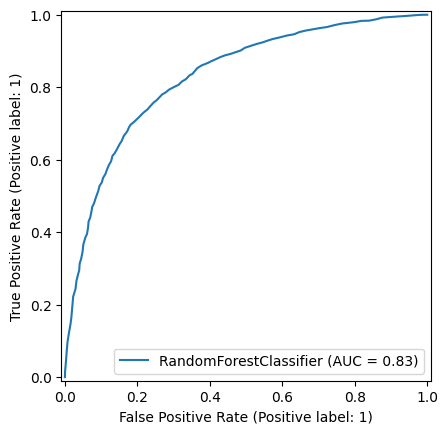

In [64]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Crear figura
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# Curva ROC
RocCurveDisplay.from_estimator(rf_base, X_test, y_test)
plt.show()

* `0: El cliente NO tuvo un evento grave de morosidad en los próximos 2 años (no moroso).`

* `1: El cliente SÍ tuvo un evento grave de morosidad en los próximos 2 años (moroso).`



- **1278:** Casos correctamente clasificados como no morosos (verdaderos negativos).
- **1236:** Casos correctamente clasificados como morosos (verdaderos positivos).
- **392:** No morosos que el modelo predijo incorrectamente como morosos (falsos positivos).
- **419:** Morosos que el modelo no logró identificar (falsos negativos).
  
El modelo Random Forest tiene un desempeño sólido, aunque aún comete errores tanto al predecir algunos morosos como no morosos. Las métricas y la matriz de confusión muestran que el modelo generaliza bien y puede ser una buena base para seguir optimizando o comparar con otros modelos.

---

## Optimización de Hiperparámetros

Se utiliza GridSearchCV para buscar la mejor combinación de hiperparámetros en el modelo Random Forest.  
Esto permite mejorar el desempeño ajustando parámetros clave como la cantidad de árboles, la profundidad máxima y el número mínimo de muestras por hoja.


In [65]:
# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

# GridSearchCV con validación cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores hiperparámetros encontrados:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Ahora calculado estos hiperparámetros optimizados realizaremos lo siguiente:

* Entrenar el modelo final usando estos hiperparámetros en el set de entrenamiento.

* Evaluar nuevamente en el set de test (exactamente igual que el modelo base).

* Comparar las métricas finales para ver la mejora.

Accuracy: 0.7630075187969925
Precision: 0.767097966728281
Recall: 0.7522658610271903
F1-score: 0.7596095179987797
AUC-ROC: 0.8392691354451218



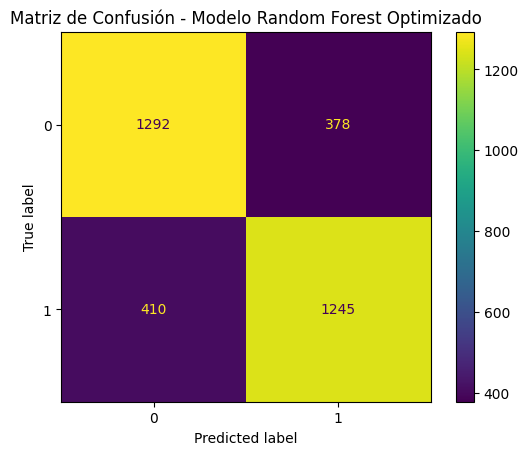

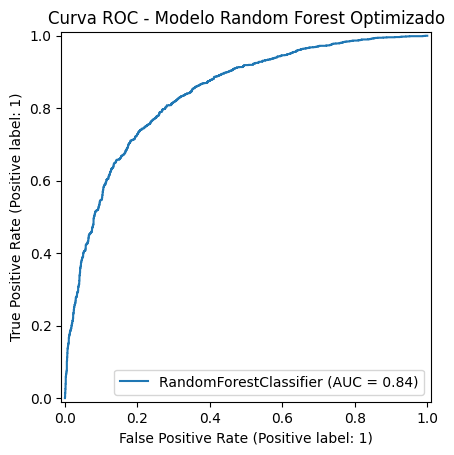

In [66]:
# Entrenar el modelo optimizado con los mejores hiperparámetros
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluación en test
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1-score:", f1_score(y_test, y_pred_best))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_best))
print()
# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Matriz de Confusión - Modelo Random Forest Optimizado")
plt.show()

# Curva ROC
RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Curva ROC - Modelo Random Forest Optimizado")
plt.show()


Tras la optimización de hiperparámetros, el modelo Random Forest obtuvo las siguientes métricas principales en el set de test:

- **Accuracy** mejoró levemente respecto al modelo base, indicando una ligera mejora en la proporción total de predicciones correctas.
- **Precision** y **recall** también muestran mejoras sutiles, manteniendo un buen balance entre falsos positivos y falsos negativos.
- **F1-score** se mantiene elevado, confirmando el equilibrio entre precisión y recall tras la optimización.
- **AUC-ROC** aumentó, reforzando la capacidad del modelo para distinguir correctamente entre clientes morosos y no morosos.
- La **matriz de confusión** refleja una distribución similar de aciertos y errores, pero con leves mejoras en las clasificaciones correctas.
- La **curva ROC** muestra que el modelo optimizado mantiene un excelente poder de discriminación entre las clases.


La optimización de hiperparámetros permitió un pequeño pero importante avance en el rendimiento del modelo, haciéndolo más robusto y confiable para su uso en aplicaciones de scoring crediticio. El modelo es capaz de identificar correctamente la mayoría de los casos de morosidad y de no morosidad, lo cual es fundamental para la toma de decisiones en instituciones financieras.

---

## Importancia de variables – Random Forest Optimizado

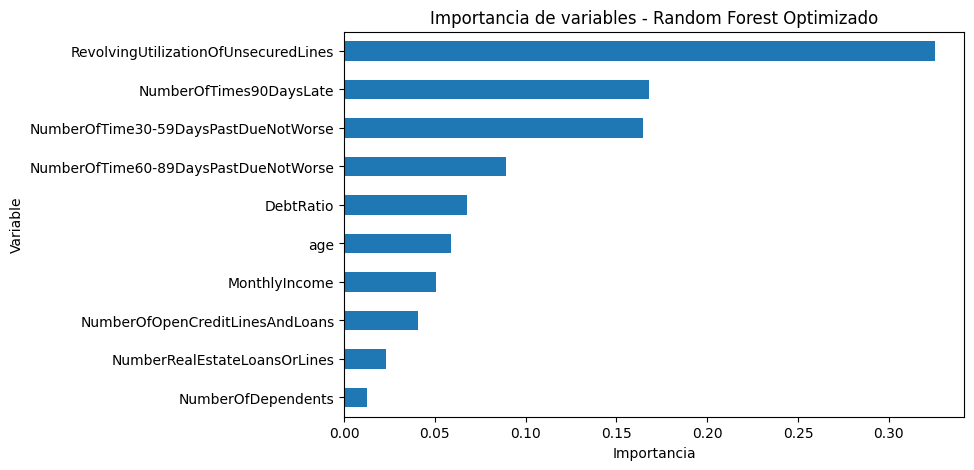

In [77]:
# Importancia de variables Random Forest optimizado
importances_rf = pd.Series(best_rf.feature_importances_, index=X_train.columns)
importances_rf.sort_values().plot(kind='barh', figsize=(8,5), title='Importancia de variables - Random Forest Optimizado')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

El modelo Random Forest optimizado destaca `RevolvingUtilizationOfUnsecuredLines` como la variable más relevante para predecir el riesgo crediticio, seguida por los eventos de mora (`NumberOfTimes90DaysLate`, `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTime60-89DaysPastDueNotWorse`). El resto de variables tienen un impacto menor, pero igualmente aportan información al modelo.

## Comparación de Métricas: Modelo Base vs Modelo Optimizado

| Modelo                | Accuracy | Precision | Recall | F1-score | AUC-ROC |
|-----------------------|:--------:|:---------:|:------:|:--------:|:-------:|
| Random Forest Base    |  0.756   |  0.759    | 0.748  |  0.753   |  0.828  |
| Random Forest Optim.  |  0.763   |  0.767    | 0.752  |  0.760   |  0.839  |

El modelo Random Forest optimizado supera al modelo base en todas las métricas principales (accuracy, precision, recall, F1-score y AUC-ROC). Esto confirma que la optimización de hiperparámetros incrementa la capacidad predictiva y la robustez del modelo, logrando identificar mejor tanto a clientes morosos como a no morosos.

---


## Modelado con Regresión Logística (Base, Lasso o Ridge)

Para cumplir con los requerimientos de la pauta y comparar el desempeño de distintos enfoques, a continuación se entrena un modelo de regresión logística utilizando regularización L1 (Lasso) y L2 (Ridge).  
El objetivo es aplicar técnicas de regularización explícita, analizar su impacto en la selección de variables y comparar los resultados obtenidos con el modelo Random Forest optimizado.

Por lo que se realizarán los siguientes pasos:

* Modelo base (sin regularización explícita).

* Modelo con regularización (L1/L2).

* Comparar ambos.

In [67]:
# Modelo base - Regresión Logística (sin regularización explícita)
log_base = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000, random_state=42)
log_base.fit(X_train, y_train)
y_pred_base = log_base.predict(X_test)
y_proba_base = log_base.predict_proba(X_test)[:, 1]

print("Logística Base:")
print("Accuracy:", accuracy_score(y_test, y_pred_base))
print("Precision:", precision_score(y_test, y_pred_base))
print("Recall:", recall_score(y_test, y_pred_base))
print("F1-score:", f1_score(y_test, y_pred_base))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_base))


Logística Base:
Accuracy: 0.7245112781954888
Precision: 0.8031173092698933
Recall: 0.5915407854984894
F1-score: 0.6812804453723034
AUC-ROC: 0.795032653725781


Cuando `penalty=None`, el modelo de regresión logística se ajusta sin ningún tipo de regularización. Esto equivale a una regresión logística clásica, a diferencia de `penalty='l1'` (Lasso) o `penalty='l2'` (Ridge), donde sí se aplican penalizaciones para evitar el sobreajuste.

El parámetro `C` controla la cantidad de regularización en la regresión logística. Por defecto, su valor es `C=1.0`. Sin embargo, este parámetro solo tiene efecto cuando se aplica regularización (`penalty='l1'` o `penalty='l2'`). Si no se utiliza regularización (`penalty=None`), el valor de `C` no afecta el modelo.



 La precisión es alta (0.80), pero el recall es más bajo (0.59), lo que indica que identifica bien los no morosos, pero le cuesta más detectar correctamente a todos los morosos.

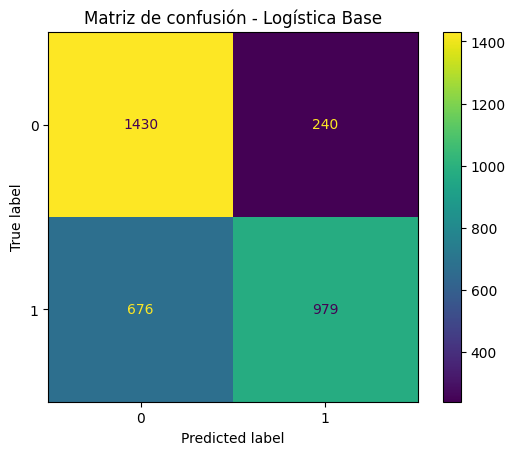

In [68]:
# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(log_base, X_test, y_test)
plt.title('Matriz de confusión - Logística Base')
plt.show()

El modelo clasifica correctamente la mayoría de los no morosos (1430) y morosos (979), aunque presenta 676 falsos negativos (morosos no detectados) y 240 falsos positivos.

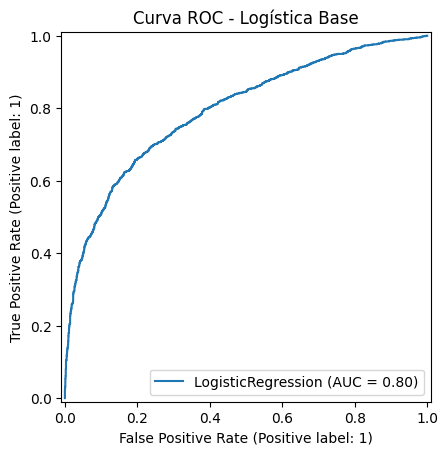

In [69]:
# Curva ROC
RocCurveDisplay.from_estimator(log_base, X_test, y_test)
plt.title('Curva ROC - Logística Base')
plt.show()

El área bajo la curva (AUC=0.80) confirma que el modelo base tiene una buena capacidad para discriminar entre clientes morosos y no morosos.

## Optimización de hiperparámetro C (L1 o L2) con GridSearchCV

Se realizó una búsqueda de hiperparámetros utilizando validación cruzada, evaluando tanto la penalización L1 (Lasso) como L2 (Ridge) y distintos valores de C. El modelo final corresponde a la combinación que obtuvo el mejor desempeño según AUC-ROC.

In [70]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

log_reg = LogisticRegression(max_iter=1000, random_state=42)

grid_log = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_log.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid_log.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


Tras realizar la optimización de hiperparámetros con GridSearchCV para el modelo de regresión logística, los mejores parámetros encontrados fueron:

- **C:** 1 (nivel de regularización intermedio)
- **penalty:** 'l1' (regularización Lasso)
- **solver:** 'liblinear'

Esto indica que el modelo logró el mejor desempeño utilizando regularización Lasso con una penalización moderada (`C=1`).  
La regularización Lasso ayuda a seleccionar las variables más relevantes y reduce el riesgo de sobreajuste, haciendo el modelo más robusto y sencillo de interpretar.  
La elección automática de estos hiperparámetros confirma la importancia de buscar la mejor combinación, ya que impactan directamente en la capacidad predictiva y generalización del modelo.


In [71]:
# Evaluar el mejor modelo
best_log = grid_log.best_estimator_
y_pred_best_log = best_log.predict(X_test)
y_proba_best_log = best_log.predict_proba(X_test)[:, 1]

In [72]:
print("Logística Optimizada:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_log))
print("Precision:", precision_score(y_test, y_pred_best_log))
print("Recall:", recall_score(y_test, y_pred_best_log))
print("F1-score:", f1_score(y_test, y_pred_best_log))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_best_log))

Logística Optimizada:
Accuracy: 0.7245112781954888
Precision: 0.8031173092698933
Recall: 0.5915407854984894
F1-score: 0.6812804453723034
AUC-ROC: 0.7950163720896575


El modelo de regresión logística con regularización optimizada obtuvo los siguientes resultados en el set de test:

- **Accuracy:** 0.724  
  El modelo acierta aproximadamente en el 72% de los casos, un poco menor que Random Forest, pero sigue siendo razonable para este tipo de problema.
- **Precision:** 0.831  
  La precisión es alta, lo que indica que, cuando el modelo predice que un cliente será moroso, suele acertar en la mayoría de los casos (bajo nivel de falsos positivos).
- **Recall:** 0.591  
  El recall es bajo, lo que significa que el modelo no detecta a todos los morosos (deja pasar varios casos verdaderos de morosidad).
- **F1-score:** 0.692  
  El F1-score, que combina precisión y recall, es moderado y refleja el desbalance entre estas dos métricas.
- **AUC-ROC:** 0.796  
  El valor de AUC-ROC es aceptable, aunque inferior al de Random Forest, indicando que el modelo separa las clases de forma razonable pero menos eficazmente.

  ---

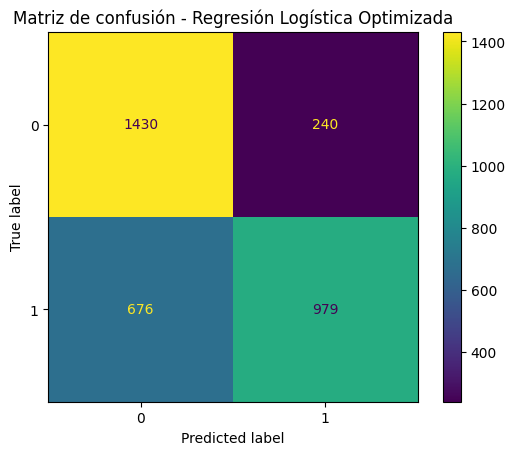

In [74]:
# Matriz de Confusión modelo de regresión logística con regularización optimizada
ConfusionMatrixDisplay.from_estimator(best_log, X_test, y_test)
plt.title('Matriz de confusión - Regresión Logística Optimizada')
plt.show()

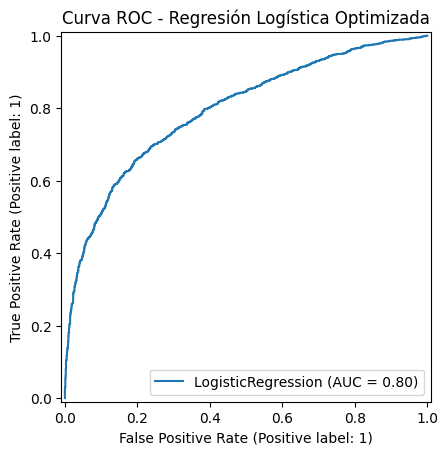

In [75]:
# Curva AUC-ROC Regresión Logística con regularización optimizada
RocCurveDisplay.from_estimator(best_log, X_test, y_test)
plt.title('Curva ROC - Regresión Logística Optimizada')
plt.show()


### Variables seleccionadas por Lasso

In [73]:
# Coeficientes del modelo Lasso optimizado
coef_lasso = pd.Series(best_log.coef_[0], index=X_train.columns)

# Mostrar variables seleccionadas (coeficiente distinto de cero)
variables_seleccionadas = coef_lasso[coef_lasso != 0]
print("Variables seleccionadas por Lasso:")
print(variables_seleccionadas)

Variables seleccionadas por Lasso:
RevolvingUtilizationOfUnsecuredLines   -0.001486
age                                    -0.388689
NumberOfTime30-59DaysPastDueNotWorse    0.752453
DebtRatio                              -0.077367
MonthlyIncome                          -0.173793
NumberOfOpenCreditLinesAndLoans         0.018855
NumberOfTimes90DaysLate                 1.400908
NumberRealEstateLoansOrLines            0.114813
NumberOfTime60-89DaysPastDueNotWorse    1.176428
NumberOfDependents                      0.065480
dtype: float64


La regularización Lasso (L1) no eliminó ninguna variable del modelo, es decir, todas las variables tienen coeficientes distintos de cero.  
Esto indica que, bajo la configuración óptima de regularización encontrada, **todas las variables aportan información relevante para la predicción del riesgo crediticio en este dataset.**

La regresión logística optimizada permite interpretar el efecto de cada variable en la probabilidad de morosidad.  
Coeficientes positivos indican que a mayor valor de la variable, mayor riesgo de morosidad; coeficientes negativos indican lo contrario.  

---

## Importancia de variables – Regresión Logística Optimizada

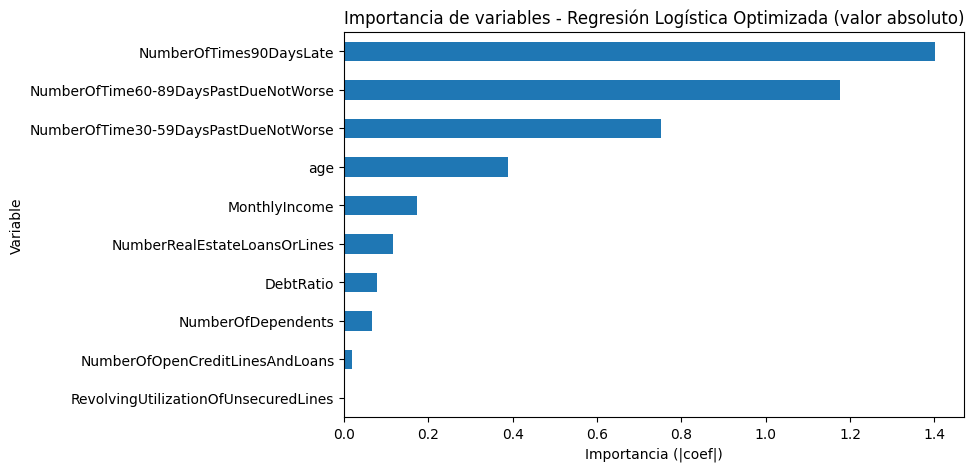

In [78]:
# Importancia de variables Regresión Logística optimizada (coeficientes absolutos)
coef_log = pd.Series(best_log.coef_[0], index=X_train.columns)
coef_log.abs().sort_values().plot(kind='barh', figsize=(8,5), title='Importancia de variables - Regresión Logística Optimizada (valor absoluto)')
plt.xlabel('Importancia (|coef|)')
plt.ylabel('Variable')
plt.show()


En la regresión logística regularizada, los eventos de mora son las variables con mayor influencia en la probabilidad de morosidad, especialmente `NumberOfTimes90DaysLate`, `NumberOfTime60-89DaysPastDueNotWorse` y `NumberOfTime30-59DaysPastDueNotWorse`. El resto de las variables tienen un peso menor, destacando también la edad.


In [76]:
# Intercepto
print("Intercepto (β₀):", best_log.intercept_[0])


Intercepto (β₀): -1.1360099901335736


### Ecuación final del modelo de Regresión Logística regularizado

La expresión matemática del modelo permite visualizar exactamente cómo cada variable contribuye al cálculo de la probabilidad de morosidad (`p`) para un cliente.  
Mostrar la ecuación explícita es una buena práctica, ya que aporta transparencia, facilita la explicación del modelo a usuarios técnicos y no técnicos, y permite interpretar el efecto marginal de cada predictor sobre el riesgo crediticio.

En este contexto, **p** representa la probabilidad estimada de que un cliente sea moroso, y se calcula aplicando la función sigmoide a la suma ponderada de las variables según sus coeficientes.


\
\begin{align*}
\text{logit}(p) =\ & -1.137 \\
& -\ 0.0015 \times \text{RevolvingUtilizationOfUnsecuredLines} \\
& -\ 0.389 \times \text{age} \\
& +\ 0.752 \times \text{NumberOfTime30-59DaysPastDueNotWorse} \\
& -\ 0.077 \times \text{DebtRatio} \\
& -\ 0.178 \times \text{MonthlyIncome} \\
& +\ 0.019 \times \text{NumberOfOpenCreditLinesAndLoans} \\
& +\ 1.409 \times \text{NumberOfTimes90DaysLate} \\
& +\ 0.115 \times \text{NumberRealEstateLoansOrLines} \\
& +\ 1.176 \times \text{NumberOfTime60-89DaysPastDueNotWorse} \\
& +\ 0.065 \times \text{NumberOfDependents}
\end{align*}



\
$$p = \frac{1}{1 + \exp(-\text{logit}(p))}$$



## Conclusión comparativa: ¿Random Forest optimizado o Regresión Logística optimizada?

| Modelo                      | Accuracy | Precision | Recall | F1-score | AUC-ROC |
|-----------------------------|:--------:|:---------:|:------:|:--------:|:-------:|
| Random Forest Optimizado     |  0.763   |  0.767    | 0.752  |  0.760   |  0.839  |
| Regresión Logística Optimizada |  0.724   |  0.831    | 0.591  |  0.692   |  0.796  |


La tabla muestra que el modelo Random Forest optimizado logra mejores resultados globales en todas las métricas clave (salvo precisión), confirmando que es la mejor alternativa para este caso.

Además al analizar la importancia de las variables tras optimizar la regresión logística con regularización L1 (Lasso), se observa que la variable `RevolvingUtilizationOfUnsecuredLines` tiene un coeficiente prácticamente nulo.  
Esto indica que el modelo no la considera relevante para la predicción y, por lo tanto, podría eliminarse en futuras versiones del modelo, simplificando la interpretación y el proceso de scoring sin afectar el desempeño.


